# Naural network hidden layers activation embeding

#### In this notebook we will use fully connected neural network for a classification task to improve visualizations algorithm from previous classes.

In the fully connected neural network, the output of each layer is computed using the activations from the previous one. In neural network training process, each successive layer learns to extract features from data with increasingly higher levels of abstraction. In this exercise, instead of directly visualizing data, we'll try to visualize the activation of hidden layers in neural networks. Using this idea, we can improve the process of data visualization, and on the other hand, see how processing this data looks like by a neural network.

In the first stage, we define simple architecture of the neural network and train it to recognize digits in the MNIST dataset

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from keras.optimizers import SGD
from keras import backend as K

from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


%matplotlib inline
plt.rcParams["animation.html"] = "jshtml"

In [64]:
nb_classes = 10

The dropout layers have the very specific function to drop out a random set of activations in that layers by setting them to zero in the forward pass. Simple as that.
It allows to avoid overfitting but has to be used only at training time and not at test time.

In [65]:
# set dropout rate - fractions of neurons to drop

dropout = 0.5

In [66]:
# build very simple neural network with 2 hidden layers

model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(64, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(nb_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
# The binary_crossentropy loss expects a one-hot-vector as input,
# so we apply the to_categorical function from keras.utilis to convert integer labels to one-hot-vectors.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [68]:
X_train.shape

(60000, 28, 28)

In [69]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Put everything on grayscale
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)


In [70]:
# split training and validation data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=5/6)

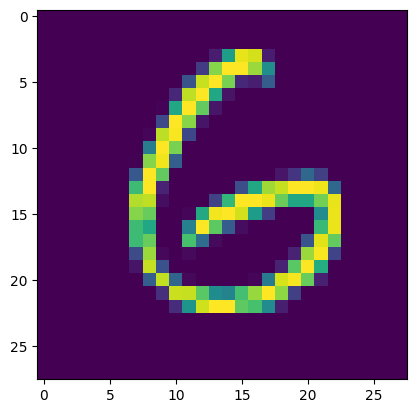

In [71]:
# show example digit
plt.imshow(X_train[0].reshape(28, 28))

In [72]:
# When we have defined and compiled the model, it can be trained using the fit function.
# We also use validation dataset to monitor validation loss and accuracy.

network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6444 - loss: 1.0888 - val_accuracy: 0.9340 - val_loss: 0.2215
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9052 - loss: 0.3369 - val_accuracy: 0.9489 - val_loss: 0.1721
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9291 - loss: 0.2511 - val_accuracy: 0.9578 - val_loss: 0.1442
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9398 - loss: 0.2154 - val_accuracy: 0.9610 - val_loss: 0.1326
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9479 - loss: 0.1881 - val_accuracy: 0.9660 - val_loss: 0.1161
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9529 - loss: 0.1669 - val_accuracy: 0.9690 - val_loss: 0.1063
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9553 - loss: 0.1548 - val_accuracy: 0.9700 - val_loss: 0.1033
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9607 - loss: 0.1453 - val_accuracy: 0.

In [73]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

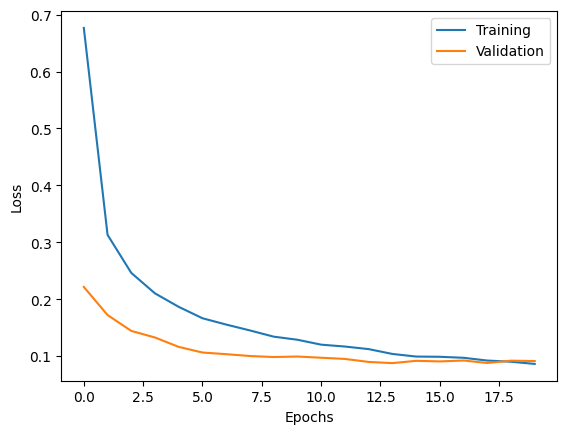

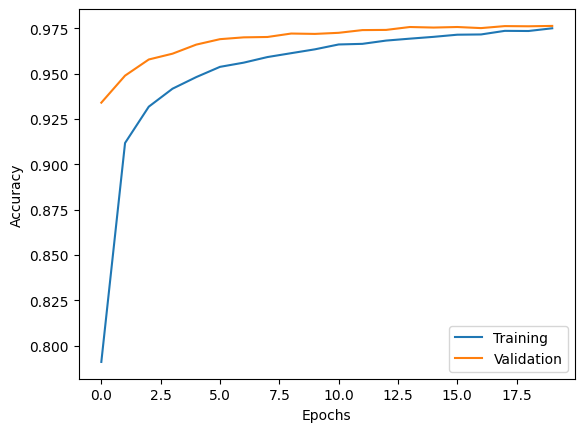

In [74]:
# fit function return keras.callbacks.History object which contains the entire history
# of training/validation loss, accuracy and other metrices for each epoch.
# We can therefore plot the behaviour of loss and accuracy during the training phase.

plot_history(network_history)

In [75]:
# Keras Model have summary function, that print data about model architecture
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 654,176 (2.50 MB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 436,118 (1.66 MB)

In [76]:
# We are interested in downloading the activation of hidden layers, because the dropout layers are between them,
# we need to properly select the index of the three dense layers.

new_model = Model(inputs=model.inputs, 
                  outputs=[model.layers[0].output, model.layers[2].output, model.layers[4].output])

layer1_output, layer2_output, layer3_output = new_model.predict(X_train)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [77]:
train_ids = [np.arange(len(Y_train))[Y_train[:,i] == 1] for i in range(10)]

The 2 graphs below are not directly related to the topic of the exercise, but they visualize very well how neuron activation actives work and for explanation are included.

In [78]:
%%capture
%matplotlib inline

# this animation shows what the example number 5 looks like
# and what activations of neurons look in hidden layers of the neural network



# digit to be plotted
digit = 5

# indices of frames to be plotted for this digit
n = range(50)

# initialize plots
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,4))

# prepare plots
ax1.set_title('Input Layer', fontsize=16)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Hidden Layer 1', fontsize=16)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax3.set_title('Hidden Layer 2', fontsize=16)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
    
ax4.set_title('Output Layer', fontsize=16)
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)   

# add numbers to the output layer plot to indicate label
for i in range(3):
    for j in range(4):
        text = ax4.text(j, i, [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, '', '']][i][j],
                        ha="center", va="center", color="w", fontsize=16)    
        
def animate(id):
    # plot elements that are changed in the animation
    digit_plot = ax1.imshow(X_train[train_ids[digit][id]].reshape((28,28)), animated=True)
    layer1_plot = ax2.imshow(layer1_output[train_ids[digit][id]].reshape((16,16)), animated=True)
    layer2_plot = ax3.imshow(layer2_output[train_ids[digit][id]].reshape((8,8)), animated=True)
    output_plot = ax4.imshow(np.append(layer3_output[train_ids[digit][id]], 
                                       [np.nan, np.nan]).reshape((3,4)), animated=True)
    return digit_plot, layer1_plot, layer2_plot, output_plot,

# define animation
ani = matplotlib.animation.FuncAnimation(f, animate, frames=n, interval=100)

In [79]:
ani

In most cases the same subset of neurons fires, while other neurons remain quiescent. This is much more obvious in the second hidden layer than in the first hidden layer and can be interpreted as the first layer pre-processesing the pixel data, while the second layer deals with pattern recognition.

This effect is mainly caused by regularization forced by dropout. Dropout generally leads to the sparse weight matrices where a significant part of connection weights are close to 0. Insignificant weights are suppressed.


Optional, nonobligatory task:
You can easily see how the visualizations change if you comment lines responsible for the dropout "model.add(Dropout(dropout))".
Remember to change "get_layer_output", because after removing the dropout, the dense layers will have indexes: 0,1,2.


In [80]:
%%capture
%matplotlib inline


# Let's check the similarity in behavior for frames showing the same digit by looking at the ensemble properties.
# In this case, ensemble properties refers to how the neurons behave on average
# for a large number of frames showing the same digit.

# digit to be plotted
digit = 6

# numbers of frames to be summed over
n = np.append([1], np.linspace(5, 100, 20, dtype=int))

# initialize plots
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,4))

# add a counter indicating the number of frames used in the summation
counter = ax1.text(1, 2, 'n={}'.format(0), color='white', fontsize=16, animated=True)

# prepare plots
ax1.set_title('Input Layer', fontsize=16)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Hidden Layer 1', fontsize=16)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax3.set_title('Hidden Layer 2', fontsize=16)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
    
ax4.set_title('Output Layer', fontsize=16)
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)   

# add numbers to the output layer plot to indicate label
for i in range(3):
    for j in range(4):
        text = ax4.text(j, i, [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, '', '']][i][j],
                        ha="center", va="center", color="w", fontsize=16)    
        
def animate(id):
    # plot elements that are changed in the animation
    digit_plot = ax1.imshow(np.sum(X_train[train_ids[digit][:id]], axis=0).reshape((28,28)), animated=True)
    layer1_plot = ax2.imshow(np.sum(layer1_output[train_ids[digit][:id]], axis=0).reshape((16,16)), animated=True)
    layer2_plot = ax3.imshow(np.sum(layer2_output[train_ids[digit][:id]], axis=0).reshape((8,8)), animated=True)
    output_plot = ax4.imshow(np.append(np.sum(layer3_output[train_ids[digit][:id]], axis=0), 
                                       [np.nan, np.nan]).reshape((3,4)), animated=True)
    counter.set_text('n={}'.format(id))
    return digit_plot, layer1_plot, layer2_plot, output_plot, counter,

# define animation
ani = matplotlib.animation.FuncAnimation(f, animate, frames=n, interval=100)

In [81]:
ani

After summing up the responses of as little as 20-30 frames, the pattern in the second hidden layer is almost static. After combining about 70-80 frames, also the pattern in the first hidden layer appears static. This supports the idea that only a subset of all neurons is involved in the recognition of individual digits.

Especially the above plot is important when we think about use of neural networks for data visualization. We can clearly see that the activation generated by examples belonging to the same class are less chaotic than the examples themselves, therefore their visualization should give a more clustered structure

# Task 1

- Project a MNIST training part into 2-dimensional space using t-SNE, TriMAP, PaCMAP and UMAP.

- Use layer1_output and layer2_output to project first and second hidden layers of neural network into a 2-dimensional space. Also divided into a test and training set, use the same methods as the point above.

- Also visualize the test part.

- Try to use 2-dimensional projection for classification task.

- Use embeddings lerned on raw train data (and also on hidden activations of train data) to transform test data (and also hidden activations of test data) into 2-dimensional space.

- Use the k-nearest neighbors algorithm to classify transformed points from the test set. Use the KNN algorithm in which you will use points from the training set as a neighbor with known class assignment. Because t-SNE is a non-linear, non-parametric embedding you cant use already learned t-SNE to transform new points into the existing embedded space. So for this part, use only UMAP with have fit_transform method (learn manifold) and also transform (only project new data to existing manifold). Try with few values of n_neighbors e.g [3, 5, 10]

- Estimate the accuracy of classification using this approach. Use all 3 layers (raw data, 1 hidden layer, 2 hidden layer) and few values of n_neighbors

In [85]:
# raw data embedings visualizations

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
import trimap
import pacmap
import umap

## Project a MNIST training part into 2-dimensional space using t-SNE, TriMAP, PaCMAP and UMAP.

In [87]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784).astype("float32") / 255
X_test = X_test.reshape(10000, 784).astype("float32") / 255

nb_classes = 10

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

test_layer1_output, test_layer2_output, test_layer3_output = new_model.predict(X_train)

y_train_inversed = np.argmax(Y_train, axis=1)
y_test_inversed = np.argmax(Y_test, axis=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [88]:
indices = np.random.choice(X_train.shape[0], size=2000, replace=False)
activations = test_layer1_output[indices]
y_subset = y_train[indices]

In [89]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [90]:
# t-SNE
tsne_results = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(activations)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...


C:\Users\ksobc\PycharmProjects\s1_2024_data_visualization\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ksobc\PycharmProjects\s1_2024_data_visualization\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[t-SNE] Computed neighbors for 2000 samples in 0.478s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 2.291699
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.932457
[t-SNE] KL divergence after 300 iterations: 1.329252


In [91]:
# TriMAP
trimap_results = trimap.TRIMAP().fit_transform(activations)

In [92]:
# PaCMAP
pacmap_results = pacmap.PaCMAP(n_components=2, n_neighbors=30, MN_ratio=0.5, FP_ratio=2.0).fit_transform(activations)

In [93]:
# UMAP
umap_results = umap.UMAP().fit_transform(activations)

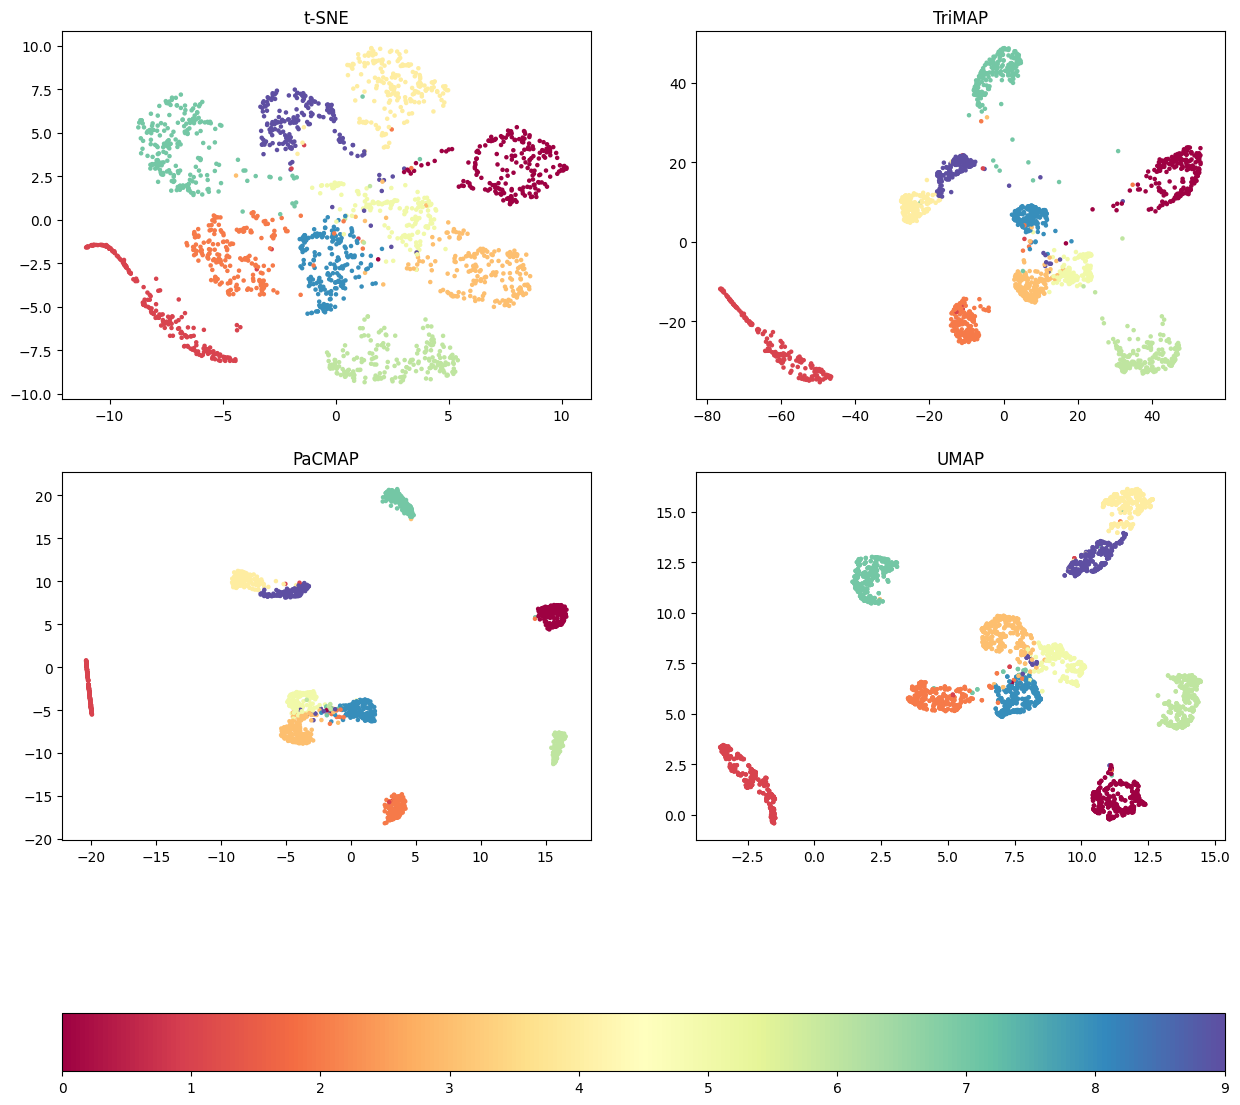

In [94]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# t-SNE plot
axs[0, 0].scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_subset, cmap='Spectral', s=5)
axs[0, 0].set_title('t-SNE')

# TriMAP plot
axs[0, 1].scatter(trimap_results[:, 0], trimap_results[:, 1], c=y_subset, cmap='Spectral', s=5)
axs[0, 1].set_title('TriMAP')

# PaCMAP plot
axs[1, 0].scatter(pacmap_results[:, 0], pacmap_results[:, 1], c=y_subset, cmap='Spectral', s=5)
axs[1, 0].set_title('PaCMAP')

# UMAP plot
axs[1, 1].scatter(umap_results[:, 0], umap_results[:, 1], c=y_subset, cmap='Spectral', s=5)
axs[1, 1].set_title('UMAP')

plt.colorbar(axs[1, 1].scatter(umap_results[:, 0], umap_results[:, 1], c=y_subset, cmap='Spectral', s=5), ax=axs, location='bottom')
plt.show()

## Use layer1_output and layer2_output to project first and second hidden layers of neural network into a 2-dimensional space. Also divided into a test and training set, use the same methods as the point above.

In [105]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784).astype('float32') / 255
y_train = to_categorical(y_train, 10)

layer1_train, layer1_test, y_train, y_test = train_test_split(layer1_output, y_train, test_size=0.2, random_state=42)
layer2_train, layer2_test, _, _ = train_test_split(layer2_output, y_train, test_size=0.2, random_state=42)

# Select a subset for visualization to keep computation time reasonable
layer1_output = np.random.rand(60000, 256)
layer2_output = np.random.rand(60000, 64)

layer1_train, layer1_test, y_layer1_train, y_layer1_test = train_test_split(layer1_output, y_train, test_size=0.2, random_state=42)
layer2_train, layer2_test, y_layer2_train, y_layer2_test = train_test_split(layer2_output, y_train, test_size=0.2, random_state=42)

indices_train = np.random.choice(layer1_train.shape[0], size=1000, replace=False)
indices_test = np.random.choice(layer1_test.shape[0], size=250, replace=False)

ValueError: Found input variables with inconsistent numbers of samples: [50000, 60000]

In [ ]:
def reduce_and_plot(method, data_train, data_test, y_train_subset, y_test_subset, title):
    train_transformed = method.fit_transform(data_train)
    test_transformed = method.fit_transform(data_test)
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 7))
    scatter = ax[0].scatter(train_transformed[:, 0], train_transformed[:, 1], c=y_train_subset, cmap='Spectral', s=5)
    ax[0].set_title(f'{title} Training Set')
    scatter = ax[1].scatter(test_transformed[:, 0], test_transformed[:, 1], c=y_test_subset, cmap='Spectral', s=5)
    ax[1].set_title(f'{title} Test Set')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
reduce_and_plot(tsne, layer1_train[indices_train], layer1_test[indices_test], y_train[indices_train], y_test[indices_test], 't-SNE Layer 1')
reduce_and_plot(tsne, layer2_train[indices_train], layer2_test[indices_test], y_train[indices_train], y_test[indices_test], 't-SNE Layer 1')

In [ ]:
# For TriMAP
trimap_reducer = trimap.TRIMAP()
reduce_and_plot(trimap_reducer, layer1_train[indices_train], layer1_test[indices_test], y_train[indices_train], y_test[indices_test], 'Layer 1 TriMAP')
reduce_and_plot(trimap_reducer, layer2_train[indices_train], layer2_test[indices_test], y_train[indices_train], y_test[indices_test], 'Layer 2 TriMAP')

# For PaCMAP
pacmap_reducer = pacmap.PaCMAP(n_components=2, n_neighbors=30, MN_ratio=0.5, FP_ratio=2.0)  # Initialize PaCMAP
reduce_and_plot(pacmap_reducer, layer1_train[indices_train], layer1_test[indices_test], y_train[indices_train], y_test[indices_test], 'Layer 1 PaCMAP')
reduce_and_plot(pacmap_reducer, layer2_train[indices_train], layer2_test[indices_test], y_train[indices_train], y_test[indices_test], 'Layer 2 PaCMAP')

# For UMAP
umap_reducer = umap.UMAP()
reduce_and_plot(umap_reducer, layer1_train[indices_train], layer1_test[indices_test], y_train[indices_train], y_test[indices_test], 'Layer 1 UMAP')
reduce_and_plot(umap_reducer, layer2_train[indices_train], layer2_test[indices_test], y_train[indices_train], y_test[indices_test], 'Layer 2 UMAP')

# Task 2

Repeate the above training procedures and visualizations for FMNIST (or any other dataset of your choice)